In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
matches = pd.read_csv('../dataset/squash_dataset.csv')


In [3]:
print(matches.keys())
print(matches.shape)
matches.head()

Index(['id', 'usr_id', 'cntr_id', 'bkng_id', 'oppnt_id', 'match_id',
       'centre_user_verified', 'centre_verified', 'created', 'date_time',
       'match_type', 'result', 'score', 'sets_won', 'sport', 'status', 'team',
       'user_opponent_verified', 'user_verified', 'verified', 'user_id',
       'centre_id', 'booking_id', 'opponent'],
      dtype='object')
(13000, 24)


,id,usr_id,cntr_id,bkng_id,oppnt_id,match_id,centre_user_verified,centre_verified,created,date_time,...,sport,status,team,user_opponent_verified,user_verified,verified,user_id,centre_id,booking_id,opponent
0,3,72,3,560,4811,3569ff25-b91f-4286-b3c5-c2a0e03c6608,a27ac136-1bdf-11e9-a311-4a63b083e8d2_a0c4ab89-...,a27ac136-1bdf-11e9-a311-4a63b083e8d2_True,2021-11-04T06:32:15,2021-11-04_11:00,...,squash,CONFIRMED,player2,a0c4ab89-8519-48e7-96aa-7e1987bf9560_9da27bdc-...,a0c4ab89-8519-48e7-96aa-7e1987bf9560_True,True,a0c4ab89-8519-48e7-96aa-7e1987bf9560,a27ac136-1bdf-11e9-a311-4a63b083e8d2,9f864c93-66b4-48ff-95b3-bff5be71ffca,9da27bdc-13cf-4bb7-a699-894f34482a32
1,4,72,3,560,4811,6553e2ed-6a7c-4044-99d5-64c019fba188,a27ac136-1bdf-11e9-a311-4a63b083e8d2_a0c4ab89-...,a27ac136-1bdf-11e9-a311-4a63b083e8d2_True,2021-11-04T06:32:15,2021-11-04_11:00,...,squash,CONFIRMED,player2,a0c4ab89-8519-48e7-96aa-7e1987bf9560_9da27bdc-...,a0c4ab89-8519-48e7-96aa-7e1987bf9560_True,True,a0c4ab89-8519-48e7-96aa-7e1987bf9560,a27ac136-1bdf-11e9-a311-4a63b083e8d2,9f864c93-66b4-48ff-95b3-bff5be71ffca,9da27bdc-13cf-4bb7-a699-894f34482a32
2,5,72,3,537,3580,9989716a-30b2-44ef-8888-84a8746ffa6f,a27ac136-1bdf-11e9-a311-4a63b083e8d2_a0c4ab89-...,a27ac136-1bdf-11e9-a311-4a63b083e8d2_True,2021-11-14T11:53:34,2021-11-14_17:00,...,squash,CONFIRMED,player2,a0c4ab89-8519-48e7-96aa-7e1987bf9560_8a570cb0-...,a0c4ab89-8519-48e7-96aa-7e1987bf9560_True,True,a0c4ab89-8519-48e7-96aa-7e1987bf9560,a27ac136-1bdf-11e9-a311-4a63b083e8d2,1d0eb25d-7447-4706-b2df-d9c8747e5dce,8a570cb0-41c8-4782-9dc1-54d5e810016b
3,6,72,3,560,6016,9f680b6f-dc0c-448b-b75c-fb92adafe19c,a27ac136-1bdf-11e9-a311-4a63b083e8d2_a0c4ab89-...,a27ac136-1bdf-11e9-a311-4a63b083e8d2_True,2021-11-04T06:32:16,2021-11-04_11:00,...,squash,CONFIRMED,player2,a0c4ab89-8519-48e7-96aa-7e1987bf9560_17a70716-...,a0c4ab89-8519-48e7-96aa-7e1987bf9560_True,True,a0c4ab89-8519-48e7-96aa-7e1987bf9560,a27ac136-1bdf-11e9-a311-4a63b083e8d2,9f864c93-66b4-48ff-95b3-bff5be71ffca,17a70716-9e7c-4917-84fd-15622bd6f3dd
4,7,72,3,560,6016,b20b2252-9fd5-4cd4-92eb-50fc969d87c0,a27ac136-1bdf-11e9-a311-4a63b083e8d2_a0c4ab89-...,a27ac136-1bdf-11e9-a311-4a63b083e8d2_True,2021-11-04T06:32:17,2021-11-04_11:00,...,squash,CONFIRMED,player1,a0c4ab89-8519-48e7-96aa-7e1987bf9560_17a70716-...,a0c4ab89-8519-48e7-96aa-7e1987bf9560_True,True,a0c4ab89-8519-48e7-96aa-7e1987bf9560,a27ac136-1bdf-11e9-a311-4a63b083e8d2,9f864c93-66b4-48ff-95b3-bff5be71ffca,17a70716-9e7c-4917-84fd-15622bd6f3dd


In [4]:
# Cleaning the data.... 
'''
       Required Params:
              - usr_id
              - date_time (for temporal k)
              - result 
              - score 
              - sets-won
              - cntr_id (for clustering)
              - oppnt_id
              - user_id
              - opponent 
              - centre_id
'''
matches_dropset = ['match_id',
       'centre_user_verified', 'centre_verified', 'created', 'match_type', 'sport', 'status', 'team',
       'user_opponent_verified', 'user_verified', 'verified', 'booking_id']
try:
       matches.drop(matches_dropset,inplace=True,axis=1)
except Exception as e:
       print("Keys not found")

# check if identifier is unique (can be used as primary key)
primary_keys = []
for k in matches.keys():
       if matches[k].is_unique:
              primary_keys.append(k)
print('All keys', matches.keys())
print('Primary keys',primary_keys)
dataset = matches
matches.loc[20]

All keys Index(['id', 'usr_id', 'cntr_id', 'bkng_id', 'oppnt_id', 'date_time', 'result',
       'score', 'sets_won', 'user_id', 'centre_id', 'opponent'],
      dtype='object')
Primary keys ['id']


id                                             40
usr_id                                       1405
cntr_id                                         3
bkng_id                                      4958
oppnt_id                                     9325
date_time                        2021-11-02_21:00
result                                          L
score                                   [[11, 9]]
sets_won                                        0
user_id      07e82391-0086-4b91-b5df-c6e50d7c71e7
centre_id    a27ac136-1bdf-11e9-a311-4a63b083e8d2
opponent     bf34740a-e328-4fa5-8fa0-408bfedaec5e
Name: 20, dtype: object

In [7]:
##################################################
# useless code 
md = matches.to_dict()
data = {}
for i in md['tourney_id'].keys():
    data[md['tourney_date'][i]*1000 + md['match_num'][i]] = md
dataset = pd.DataFrame.from_dict(md)
primary_keys = []
for k in dataset.keys():
       if dataset[k].is_unique:
              primary_keys.append(k)
print('All keys', dataset.keys())
print('Primary keys',primary_keys)
dataset
##################################################
dataset = matches

All keys Index(['tourney_id', 'tourney_level', 'tourney_date', 'match_num', 'winner_id',
       'winner_name', 'loser_id', 'loser_name', 'score', 'best_of'],
      dtype='object')
Primary keys []


,tourney_id,tourney_level,tourney_date,match_num,winner_id,winner_name,loser_id,loser_name,score,best_of
0,1968-2029,A,19680708,270,112411,Douglas Smith,110196,Peter Ledbetter,6-1 7-5,3
1,1968-2029,A,19680708,271,126914,Louis Pretorius,209536,Maurice Pollock,6-1 6-1,3
2,1968-2029,A,19680708,272,209523,Cecil Pedlow,209535,John Mulvey,6-2 6-2,3
3,1968-2029,A,19680708,273,100084,Tom Okker,209534,Unknown Fearmon,6-1 6-1,3
4,1968-2029,A,19680708,274,100132,Armistead Neely,209533,Harry Sheridan,6-2 6-4,3
...,...,...,...,...,...,...,...,...,...,...
188156,2022-M-DC-2022-WG2-PO-GRE-JAM-01,D,20220304,4,209362,Aristotelis Thanos,209080,Blaise Bicknell,6-4 6-4,3
188157,2022-M-DC-2022-WG2-PO-GRE-JAM-01,D,20220304,5,202065,Petros Tsitsipas,202120,Rowland Phillips,4-6 6-4 6-4,3
188158,2022-M-DC-2022-WG2-PO-HKG-BEN-01,D,20220304,1,138846,Hong Kit Jack Wong,105278,Alexis Klegou,1-6 6-4 4-1 RET,3
188159,2022-M-DC-2022-WG2-PO-HKG-BEN-01,D,20220304,2,209409,Coleman Wong,200583,Delmas Ntcha,6-4 6-4,3


In [5]:
class Player:
    def __init__(self,player_id,player_name):
        self.id = player_id
        self.name = player_name
        self.rating = 1500 # initial Elo rating 
        self.surface_rating = {'hard':1500,'clay':1500,'grass':1500}
        self.matches = []
        self.wins = 0
        self.lose = 0
        self.times = []
        self.index = 0
        self.last_match = -1
    
    def updateTime(self,time):
        if len(self.times) < 10:
            self.times.append(time)
        else:
            self.times[self.index] = time
            self.index += 1
            self.index %= 10
        csum = 0
        for i in self.times:
            csum += i
        csum /= len(self.times)
        self.last_match = csum 

    def updateProfile(self,score:list,result:str,opponent):
        matches.append((opponent.id,score))


# Elo Details

## Penalty for Missing Matches 



In [7]:
from enum import Enum

class EloType(Enum):
    vanilla = 'vanilla'
    continuous = 'continuous'
    temporal_vanilla = 'temporal-vanilla'
    temporal_continuous = 'temporal-continuous'

class Elo:
    def __init__(self,elo_type=EloType.vanilla):
        self.base = 10.0 
        self.const = 400.0 
        self.k = 8
        self.__elo_type = elo_type
    '''
        delta is the rating difference in the current match's performance
    '''
    def predict(self,delta):
        return 1 / (1 + self.base**(delta/self.const))
        

    def vanilla_elo(self,old_ratings, delta, result,time=1):
        ea = 1 / (1 + self.base**(delta/self.const))
        return old_ratings + self.k*(result - ea)

    def temporal_elo(self,old_ratings, delta, result,time_k=1):
        ea = 1 / (1 + self.base**(delta/self.const))
        return old_ratings + self.k*time_k*(result - ea)

    def elo_rate(self,old_ratings,delta,result,time=1):
        if old_ratings > 2100:
            self.k = 4 
        else:
            self.k = 8
        if self.__elo_type == EloType.vanilla:
            return self.vanilla_elo(old_ratings,delta,result,time)
        if self.__elo_type == EloType.temporal_continuous:
            return self.temporal_elo(old_ratings,delta,result,np.log(time))

In [13]:
# dataset.loc[20]
dataset.loc[dataset.shape[0]-1]
# dataset.shape[0]

id                                          34851
usr_id                                      30757
cntr_id                                         3
bkng_id                                    137575
oppnt_id                                    39607
date_time                        2024-02-28_07:00
result                                          L
score                          [[11, 6], [11, 7]]
sets_won                                        0
user_id      fdf4c76d-8f89-4a53-b409-00bf4d9d58bf
centre_id    a27ac136-1bdf-11e9-a311-4a63b083e8d2
opponent     409b7ab3-29e1-4770-94a6-f4a90a1656ce
Name: 12999, dtype: object

In [ ]:
freq = {}
freq[3] = 0
freq[5] = 0
freq[1] = 0

for i in range(dataset.shape[0]):
    freq[dataset.loc[i]['best_of']] += 1
for i in freq.keys():
    print(i,freq[i])

In [18]:
import json 
def parse_score(score:str):
    return json.loads(score)

def get_rating(score:list,result='W'):
    winner = 0
    score_p0 = 0
    score_p1 = 0
    for st in score:
        if st[0] > st[1]:
            winner += 1
            score_p0 = 130 - (10*st[1])
            score_p1 = 10*st[1]
        else:
            score_p1 = 130 - (10*st[0])
            score_p0 = 10*st[0]
    # can omit this tbh
    # if result == 'W':
    #     score_p0 += 200 
    ssc = float(score_p0 + score_p1)
    return (score_p0/ssc,score_p1/ssc)


In [14]:
from dateutil import parser 
from datetime import datetime 
def date_parser(date:str): 
    date = date.split('_')[0].split('-')
    yr = int(date[0])
    month = int(date[1])
    day = int(date[0])
    time_score = (yr - 1950)*365 + (month-1)*30 + day
    return time_score


In [19]:
players = {}
prat = {}
plerr = {}
eloObj = Elo()
name_id = {}
print(dataset.shape[0])
for i in range(dataset.shape[0]):
    pdone = int(100*i/dataset.shape[0])
    # print('\r',pdone,end=' ')
    # print('\r[',pdone*'=',(100-pdone)*'-',']',pdone,'\%',sep='',end='')
    mtch = dataset.loc[i]
    if mtch['result'] != 'W' and mtch['result'] != 'D': # only win or draw (draws are repeated currently)
        continue
    name_id[mtch['user_id']] = mtch['user_id']
    if mtch['user_id'] not in players.keys():
        players[mtch['user_id']] = Player(mtch['user_id'],mtch['user_id'])
        prat[mtch['user_id']] = [1500]
        plerr[mtch['user_id']] = [0]
    if mtch['oppnt_id'] not in players.keys():
        players[mtch['oppnt_id']] = Player(mtch['oppnt_id'],mtch['oppnt_id'])
        prat[mtch['oppnt_id']] = [1500]
        plerr[mtch['oppnt_id']] = [0]
    
    # difference in timing...
    dscore = date_parser(mtch['date_time'])
    if players[mtch['oppnt_id']].last_match == -1:
        players[mtch['oppnt_id']].last_match = dscore
    if players[mtch['user_id']].last_match == -1:
        players[mtch['user_id']].last_match = dscore
    k_loser = dscore - players[mtch['oppnt_id']].last_match
    k_winner = dscore - players[mtch['user_id']].last_match

    players[mtch['oppnt_id']].updateTime(dscore)
    players[mtch['user_id']].updateTime(dscore)
    delta = players[mtch['user_id']].rating - players[mtch['oppnt_id']].rating
    # predict result of the match 
    pred = eloObj.predict(delta) # probability of a person with rating ``advantage`` DELTA winning?? 
    try:
        # get result of the match (statistically)
        match_ratings = get_rating(parse_score(mtch['score']))
    except Exception as e:
        print("Skipped ",mtch,e)
        continue
    winner_stat = max(match_ratings[0],match_ratings[1])/(float(match_ratings[0]) + match_ratings[1])
    loser_stat = 1 - winner_stat

    plerr[mtch['oppnt_id']].append(abs(pred - loser_stat))        # might need to change this 
    plerr[mtch['user_id']].append(abs(1 - pred - winner_stat))  # might need to change this 

    players[mtch['user_id']].rating = eloObj.elo_rate(players[mtch['user_id']].rating,delta,winner_stat,k_winner)
    players[mtch['user_id']].wins +=1 
    players[mtch['oppnt_id']].rating = eloObj.elo_rate(players[mtch['oppnt_id']].rating,delta,loser_stat,k_loser)
    players[mtch['oppnt_id']].lose += 1
    prat[mtch['oppnt_id']].append(players[mtch['oppnt_id']].rating)
    prat[mtch['user_id']].append(players[mtch['user_id']].rating)

13000


a0c4ab89-8519-48e7-96aa-7e1987bf9560 1519.868015206126
4811 1482.4751274410014
6016 1496.1323929273535


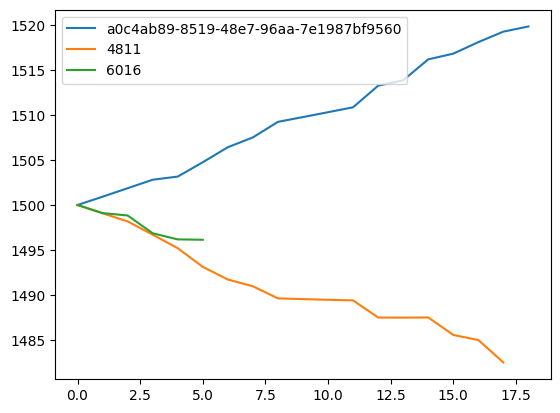

In [23]:
names = list(prat.keys())
def plotPlayer(name:str):
    if name not in prat.keys():
        print('ERROR: Name not found')
        return 
    plt.plot(range(len(prat[name])),prat[name],label=name)
    print(name,prat[name][-1])
    # plt.show()
    return
plotPlayer(names[0])
plotPlayer(names[1])
plotPlayer(names[2])
plt.legend()
plt.show()

In [45]:
tosee = {}
maxIndex = -1
for i in prat.keys():
    if len(prat[i]) not in tosee.keys():
        tosee[len(prat[i])] = [] 
    tosee[len(prat[i])].append(i)
    if len(prat[i]) >= 300 and (maxIndex == -1 or len(tosee[maxIndex]) < len(tosee[len(prat[i])])):
        maxIndex = len(prat[i])
print(tosee)
print(tosee.keys())
print(maxIndex)


{8: ['Douglas Smith', 'Tomas Lynch', 'Giuseppe Merlo', 'Detler Herdy', 'Bernd Kube', 'Manlio Bartoni', 'Alexander Marcial', 'Roberto Saya', 'Rudy Hernando', 'James Pressly', 'Alfred Schwartz', 'Dave Simmonds', 'Chuck Mckinley', 'Sever Dron', 'Vicente Zarazua', 'Jan Hajer', 'Nick Fleury', 'Bob Alloo', 'Don Turner', 'Anatoli Volkov', 'Geoffrey Olsson', 'William Mason', 'Hector Romani', 'Gaurav Misra', 'Ralph Geiger', 'Alberto Martorell', 'Salvador Cabeza', 'Joel Ross', 'Pierre Joly', 'Robert Casey C100', 'Gunther Gnettner', 'Takao Yamamoto', 'Phil Siviter', 'Peter Langsford', 'Patrice Hagelauer', 'Adolfo Gonzalez', 'Regis Brunet', 'Fabrizio Fanucci', 'Franco Merlone', 'Cary Leeds', 'Famiano Meneschincheri', 'Filip Krajcik', 'Frank Puncec', 'Ney Keller', 'Marco Armellini', 'Hans Hansson', 'Phil Lehnhoff', 'Hitoshi Shirato', 'David Macpherson', 'Michele Fioroni', 'Thierry Pham', 'Nick Fulwood', 'George Bezecny', 'James Turner', 'Andrew Burrow', 'Laurent Prades', 'Scott Warner', 'Alexis Hom

['a0c4ab89-8519-48e7-96aa-7e1987bf9560', 4811, 6016]
a0c4ab89-8519-48e7-96aa-7e1987bf9560 18 0
4811 0 17
6016 0 5


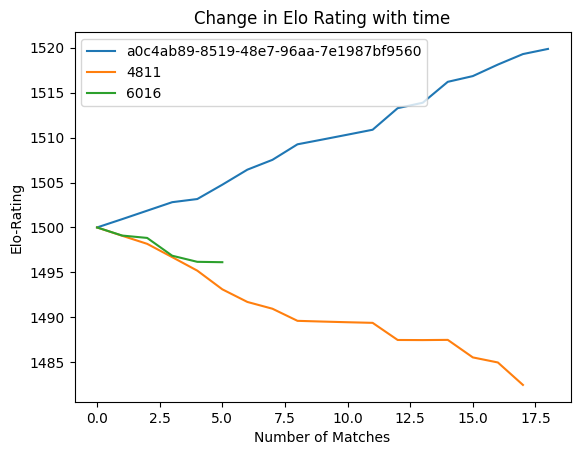

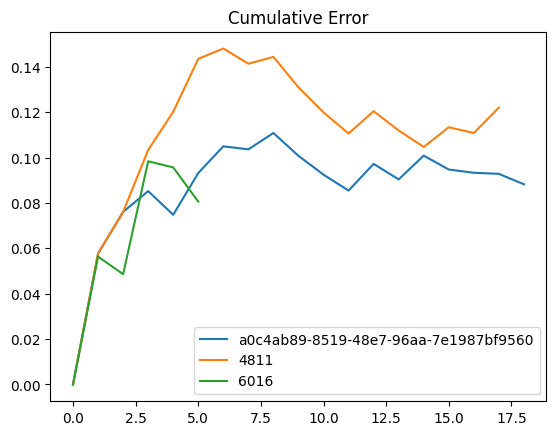

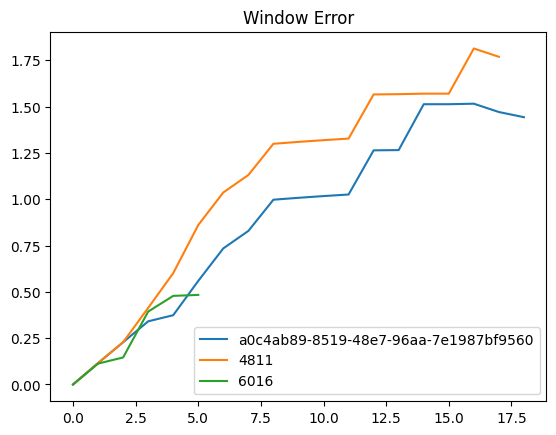

In [25]:

ppl = list(prat.keys())[:3]
print(ppl)
for i in ppl:
    print(i,players[i].wins,players[i].lose)
    # plotPlayer(i)
    plt.plot(range(len(prat[i])),prat[i],label=i)
plt.title('Change in Elo Rating with time')
plt.xlabel('Number of Matches')
plt.ylabel('Elo-Rating')
plt.legend()
plt.show()
# cumulative error 
for i in ppl:
    # plotPlayer(i)
    nmat = []
    for x in plerr[i]:
        if len(nmat) == 0:
            nmat.append(x)
        else:
            nmat.append((x+nmat[-1]*len(nmat))/(len(nmat) + 1))
    plt.plot(range(len(nmat)),nmat,label=i)
plt.title('Cumulative Error')
plt.legend()
plt.show()


# window error  
window_size = 15 
for i in ppl:
    # plotPlayer(i)
    nmat = []
    for x in range(len(plerr[i])):
        if x < window_size:
            y = 0
            ans = 0
            while y <= x:
                ans += plerr[i][y]
                y += 1
            nmat.append(ans)
        else:
            ans = 0
            y = 0 
            while y < window_size:
                y += 1
                ans += plerr[i][x - y]
            nmat.append(ans)
    plt.plot(range(len(nmat)),nmat,label=i)
plt.title('Window Error')
plt.legend()
plt.show()




In [22]:
fp = open('./dataset/rating_output.csv','a')
fp.write('ID,Rating\n')
id_name = {}
for i in name_id.keys():
    id_name[name_id[i]] = i
    fp.write(f'{name_id[i]},{prat[i][-1]}\n')
fp.close()

In [34]:
glk_results = pd.read_csv('./dataset/player_predictions.csv')
glk_results.sort_values(by=['tourney_date'])
pred_error1 = {}
pred_rating1 = {}
for i in range(glk_results.shape[0]):
    entry = glk_results.loc[i]
    player_name = id_name[entry['player_id']]
    if player_name not in pred_rating1.keys():
        pred_rating1[player_name] = []
        pred_error1[player_name] = []
    pred_rating1[player_name].append(entry['player_rating'])
    pred_error1[player_name].append(entry['prediction_error'])


    


Novak Djokovic 2220.6326886194843
Roger Federer 2528.703739149005
Rafael Nadal 2456.3567173416322


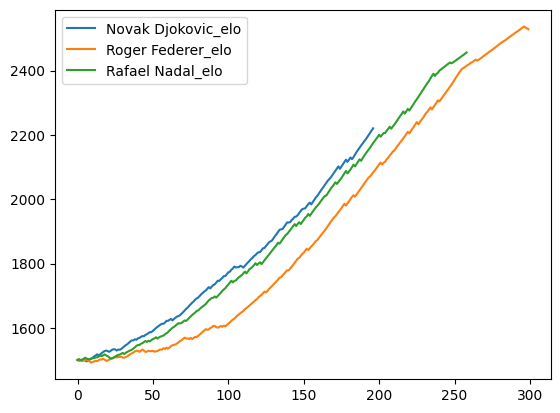

In [39]:
def plotPlayer(name:str):
    if name not in prat.keys():
        print('ERROR: Name not found')
        return 
    plt.plot(range(len(prat[name])),prat[name],label=name+'_elo')
    # plt.plot(range(len(pred_rating1[name])),pred_rating1[name],label=name+'_glk')
    print(name,prat[name][-1])
    # plt.show()
    return
plotPlayer('Novak Djokovic')
plotPlayer('Roger Federer')
plotPlayer('Rafael Nadal')
plt.legend()
plt.show()

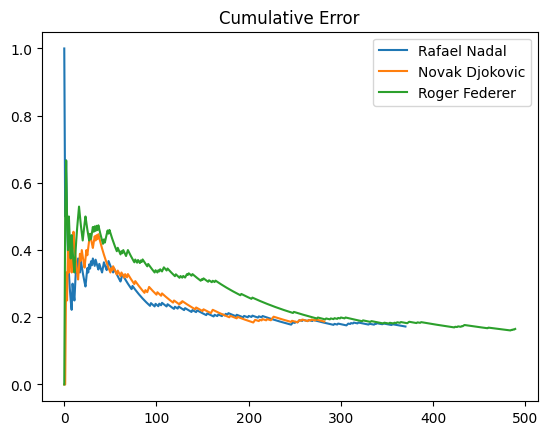

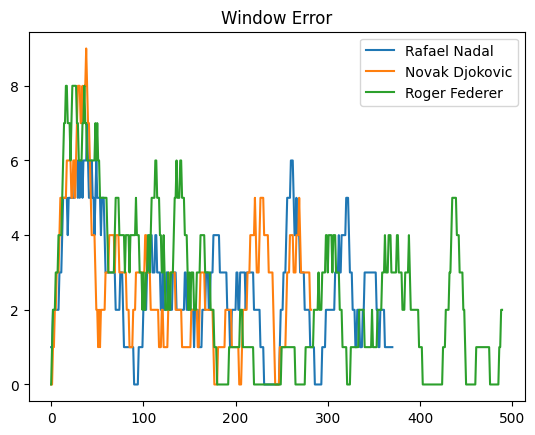

In [37]:
def plotError(name:str):
    if name not in plerr.keys():
        print('ERROR: Name not found')
        return 
    # plt.plot(range(len(plerr[name])),plerr[name],label=name+'_elo')
    plt.plot(range(len(pred_error1[name])),pred_error1[name],label=name+'_glk')
    print(name,prat[name][-1])
    # plt.show()
    return


for i in ppl:
    # plotPlayer(i)
    nmat = []
    for x in pred_error1[i]:
        if len(nmat) == 0:
            nmat.append(x)
        else:
            nmat.append((x+nmat[-1]*len(nmat))/(len(nmat) + 1))
    plt.plot(range(len(nmat)),nmat,label=i)
plt.title('Cumulative Error')
plt.legend()
plt.show()


# window error  
window_size = 15 
for i in ppl:
    # plotPlayer(i)
    nmat = []
    for x in range(len(pred_error1[i])):
        if x < window_size:
            y = 0
            ans = 0
            while y <= x:
                ans += pred_error1[i][y]
                y += 1
            nmat.append(ans)
        else:
            ans = 0
            y = 0 
            while y < window_size:
                y += 1
                ans += pred_error1[i][x - y]
            nmat.append(ans)
    plt.plot(range(len(nmat)),nmat,label=i)
plt.title('Window Error')
plt.legend()
plt.show()







# plotError('Novak Djokovic')
# plotError('Roger Federer')
# plotError('Rafael Nadal')
# plt.legend()
# plt.show()